In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('../data/course_lead_scoring_04.csv')

In [5]:
df.shape

(1462, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [7]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [8]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [9]:
columns = df.columns

In [10]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [11]:
for column in df.columns:
    if df[column].dtype == 'object':
      df[column] = df[column].fillna('NA')
      df[column] = df[column].str.lower().str.replace(' ', '_')
    else :
      df[column] = df[column].fillna(0)

In [12]:
df.isnull().sum()


lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [13]:
df_data = df.copy()

In [14]:
y_data = df_data['converted'].copy()
del df_data['converted']

In [15]:
df_full_train, df_test,y_full_train,y_test  = train_test_split(df_data,y_data,test_size=0.2,random_state=1)
df_train,df_val, y_train,y_val  = train_test_split(df_full_train,y_full_train,test_size=0.25,random_state=1)

In [16]:
len(df_train),len(df_val),len(df_test)

(876, 293, 293)

In [17]:
num_columns = []
att_columns = []

for column in df_train.columns:
    if df[column].dtype == 'object':
      att_columns.append(column)
    else :
      num_columns.append(column)

In [18]:
num_columns,att_columns

(['number_of_courses_viewed',
  'annual_income',
  'interaction_count',
  'lead_score'],
 ['lead_source', 'industry', 'employment_status', 'location'])

In [19]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [21]:
# Q1

In [20]:
for c in num_columns:
    roc = roc_auc_score(y_train,df_train[c])
    print(c,roc)

number_of_courses_viewed 0.7635680590007088
annual_income 0.5519578313253012
interaction_count 0.738270176293409
lead_score 0.6144993577250176


In [22]:
# Q2

In [23]:
def train(df_param, y_param, C=1.0):
    
    dicts = df_param.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear',C=C, max_iter=1000)
    model.fit(X_train, y_param)
    
    return dv, model

In [24]:
def predict(df_param, dv, model):
    
    dicts = df_param.to_dict(orient='records')

    X = dv.transform(dicts)
    
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [25]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
462,events,manufacturing,2,95543.0,unemployed,europe,3,0.78
135,referral,na,1,54924.0,student,south_america,6,0.39
117,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22
1051,paid_ads,other,2,34600.0,employed,south_america,2,0.31
945,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01


In [57]:
#dv, model = train(df_train,y_train)
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
    
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear',C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [63]:
#y_pred = predict(df_val,dv,model)
val_dicts = df_val.to_dict(orient='records')

X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [29]:
(y_val == (y_pred >= 0.5)).mean()

np.float64(0.6996587030716723)

In [64]:
(y_val == (y_pred >= 0.5)).mean()

np.float64(0.7510729613733905)

In [30]:
score = accuracy_score(y_val,(y_pred >= 0.5))

In [31]:
print(f"{score:.4f}")

0.6997


In [32]:
score = roc_auc_score(y_val,y_pred)

In [33]:
print(f"{score:.4f}")

0.8171


In [65]:
score = roc_auc_score(y_val,y_pred)

In [66]:
print(f"{score:.4f}")

0.8558


In [34]:
# Q3

In [35]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [36]:
thresholds = np.arange(0.0,1.0,0.01)

In [37]:
scores = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
        
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [38]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

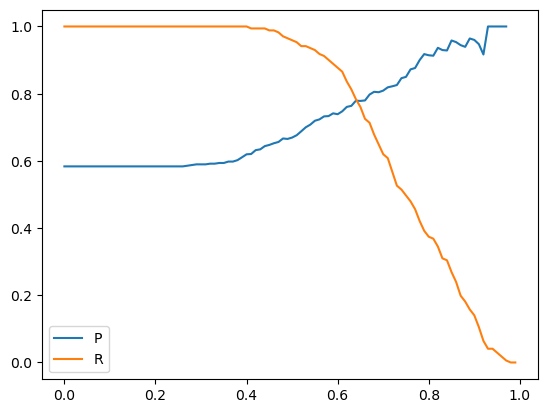

In [39]:
plt.plot(df_scores.threshold, df_scores['p'], label='P')
plt.plot(df_scores.threshold, df_scores['r'], label='R')
plt.legend()

In [40]:
from sklearn.metrics import f1_score

In [41]:
score = []
for t in thresholds:
    f1_s = f1_score(y_val, (y_pred >= t))
    score.append(f1_s)

In [42]:
np.array(score).max()

np.float64(0.8125)

In [462]:
# Q5

In [45]:
# Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds
from sklearn.model_selection import KFold

n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

In [46]:
scores = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train, y_train = df_full_train.iloc[train_idx], y_full_train.iloc[train_idx]
    df_val,   y_val   = df_full_train.iloc[val_idx], y_full_train.iloc[val_idx]

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.822 +- 0.036


In [47]:
# Q6

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for c in [0.000001, 0.001, 1]:
    aucs = []
    for train_idxs, valid_idxs in kf.split(df_full_train):
        # get the train and validation data
        X_train_fold, X_val_fold = df_full_train.iloc[train_idxs], df_full_train.iloc[valid_idxs]
        y_train_fold, y_val_fold =  y_full_train.iloc[train_idxs],  y_full_train.iloc[valid_idxs]

        train_dicts = X_train_fold.to_dict(orient='records')
        val_dicts = X_val_fold.to_dict(orient='records')
        
        dv = DictVectorizer(sparse=False)
        X_train_enc = dv.fit_transform(train_dicts)

        model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
        model.fit(X_train_enc, y_train_fold)

        X_val_enc = dv.transform(val_dicts)
        
        y_val_preds = model.predict_proba(X_val_enc)[:, 1]
        score = roc_auc_score(y_val_fold, y_val_preds)

        aucs.append(score)

    print('C: %.5f -> %.3f +- %.3f' % (c,np.mean(aucs), np.std(aucs)))
    

C: 0.00000 -> 0.560 +- 0.024
C: 0.00100 -> 0.867 +- 0.029
C: 1.00000 -> 0.822 +- 0.036
